
#   <font color='green'>**Basics of PyTorch**</font>


---


## <font color = 'blue'> **Outline**


---


### 1. Installation
### 2. Tensors
### 3. Datasets and Dataloaders
### 4. Transforms

## <font color = 'red'> **Installation of PyTorch** </font>

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

In [ ]:
torch.__version__

'1.13.1+cu116'

# <font color='red'> **Tensors** </font>


---

### Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.


###  <font color='blue'>**Initializing a Tensor**</font>


---


### <font color = 'red'> 1. Directly from data </font>


---


### Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
x_data.dtype

torch.int64

In [ ]:
x_d = torch.tensor(((2, 4, 6), (8, 10, 12)))

In [ ]:
x_d

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

### <font color = 'red'> 2. From a NumPy array </font>


---


In [ ]:
import numpy as np

In [ ]:
# https://pytorch.org/docs/stable/generated/torch.from_numpy.html

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

### <font color = 'red'> 3. From another Tensor </font>


---


In [ ]:
# https://pytorch.org/docs/stable/generated/torch.ones_like.html

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

# https://pytorch.org/docs/stable/generated/torch.rand_like.html
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6618, 0.9668],
        [0.6131, 0.0685]]) 



### <font color = 'red'> 4. With random or constant values </font>


---

### shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4648, 0.7190, 0.5359],
        [0.5784, 0.8263, 0.0139]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### <font color = 'blue'> **Attributes of a Tensor** </font>


---

### Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor = tensor.to('cuda')
print(f'Device: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Device: cuda:0


In [ ]:
# We move our tensor to the GPU if available
t = torch.tensor([1,2,3])
print(t.device)

if torch.cuda.is_available():
    t = t.to("cuda")

print(t.device)

cpu
cuda:0


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("The device is : ", device)

The device is :  cuda


### <font color = 'blue'> **Operations on Tensors** </font>


---

### Operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described https://pytorch.org/docs/stable/torch.html.

### Each of these operations can be run on the GPU (at typically higher speeds than on a CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

### By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method (after checking for GPU availability).

### <font color = 'red'> 1. Standard numpy-like indexing and slicing </font>


---

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### <font color = 'red'> 2. Joining tensors </font>


---
###  You can use torch.cat to concatenate a sequence of tensors along a given dimension. https://pytorch.org/docs/stable/generated/torch.cat.html
### See also torch.stack (https://pytorch.org/docs/stable/generated/torch.stack.html), another tensor joining op that is subtly different from torch.cat.

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
t1 = torch.tensor([1,2])
t2 = torch.tensor((3,4))

t3 = torch.stack([t1, t2], dim=0)

In [ ]:
print(t3)

tensor([[1, 2],
        [3, 4]])


### <font color = 'red'> 3. Arithmetic operations </font>


---

In [ ]:
# Addition
ta1 = torch.ones(3, 3)

a1 = ta1 + ta1
print(a1)

a2 = ta1.add(ta1)
print(a2)

p = torch.zeros(3,3)
a3 = torch.add(ta1, ta1, out=p)
print(a3)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [ ]:
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# Multiplication

# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T

print(y1)
# https://pytorch.org/docs/stable/generated/torch.matmul.html
y2 = tensor.matmul(tensor.T)
print(y2)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
print(y3)

# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
print(z1)

z2 = tensor.mul(tensor)
print(z2)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(z3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### <font color = 'red'> 4. Single-element tensors </font>
### If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():

In [ ]:
agg = tensor.sum()

# https://pytorch.org/docs/stable/generated/torch.Tensor.item.html

agg_item = agg.item()
print(agg , agg_item, type(agg_item))

tensor(12.) 12.0 <class 'float'>


###  <font color = 'red'> 5. In-place operations </font>
### Operations that store the result into the operand are called in-place.

In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


# <font color = 'red'> **Datasets and Dataloaders** </font>

---



### PyTorch provides two data primitives:
### 1. torch.utils.data.DataLoader
### 2. torch.utils.data.Dataset
### Which allow us to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

### PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here:
### Image data - https://pytorch.org/vision/stable/datasets.html
### Text data - https://pytorch.org/text/stable/datasets.html
### Audio data - https://pytorch.org/audio/stable/datasets.html

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### <font color = 'red'> 1. Loading Dataset </font>


---



In [ ]:
train_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = ToTensor())

In [ ]:
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = ToTensor())

### <font color = 'red'> 2. Iterating and Visualizing the Dataset </font>

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

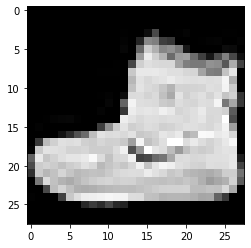

In [ ]:
im, lab = train_data[0]
print(im)
print(" - - - - - - - - - ")
print(lab)

plt.imshow(im.squeeze(), cmap="gray")

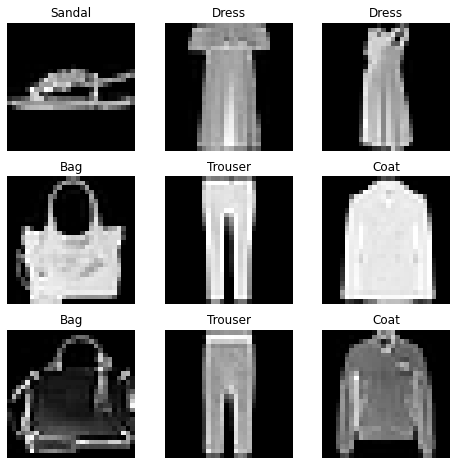

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### <font color = 'red'> 3. Preparing your data with DataLoaders </font>

In [ ]:
batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

### <font color = 'red'> 4. Iterate through the DataLoader </font>

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


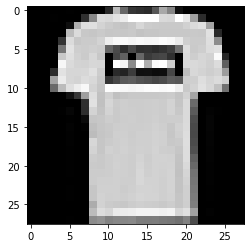

Label: 0


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[1].squeeze()
label = train_labels[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
train_batch = 0
for X, y in train_dataloader:
  #print('Shape of X is :', X.shape)
  #print('Shape of y is :', y.shape)
  train_batch = train_batch + 1

print("Total training btaches are : ", train_batch)

Total training btaches are :  938


In [ ]:
test_batch = 0
for X, y in test_dataloader:
  #print('Shape of X is :', X.shape)
  #print('Shape of y is :', y.shape)
  test_batch = test_batch + 1

print("Total testing btaches are : ", test_batch)

Total testing btaches are :  157


## Note: For detailed reading of Dataset and Dataloader:
### https://pytorch.org/docs/stable/data.html

## <font color='red'> **Transform** </font>


---



### Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

### All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels.

### The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

In [ ]:
# Lambda transforms apply any user-defined lambda function.
# Here, we define a function to turn the integer into a one-hot encoded tensor.
# It first creates a zero tensor of size 10 (the number of labels in our dataset)
# and calls scatter_ which assigns a value=1 on the index as given by the label y.

In [ ]:
# https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html

from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# **Thank You!**